<a href="https://colab.research.google.com/github/Kristiely/challenge-python/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja['loja'] = 'loja_1'
loja2 = pd.read_csv(url2)
loja2['loja'] = 'loja_2'
loja3 = pd.read_csv(url3)
loja3['loja'] = 'loja_3'
loja4 = pd.read_csv(url4)
loja4['loja'] = 'loja_4'


vendas = pd.concat([loja, loja2, loja3, loja4])

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [16]:
vendas.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')

In [17]:
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'
vendas = pd.concat([loja, loja2, loja3, loja4])
faturamento_por_loja = vendas.groupby('loja')['Preço'].sum().sort_values(ascending=False)
print(faturamento_por_loja)

loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


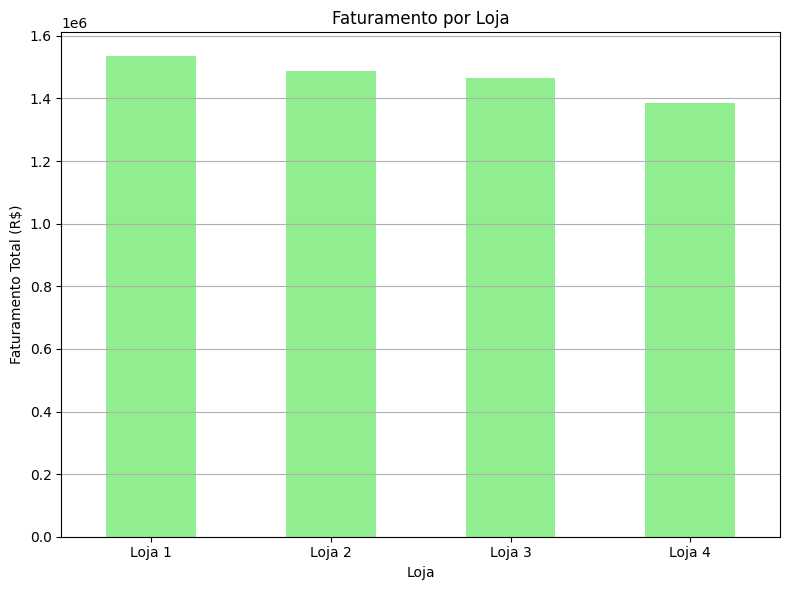

In [26]:
faturamento_por_loja.plot(kind='bar', figsize=(8, 6), color='lightgreen')
import matplotlib.pyplot as plt
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [18]:
faturamento_categoria = vendas.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(faturamento_categoria)


Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64


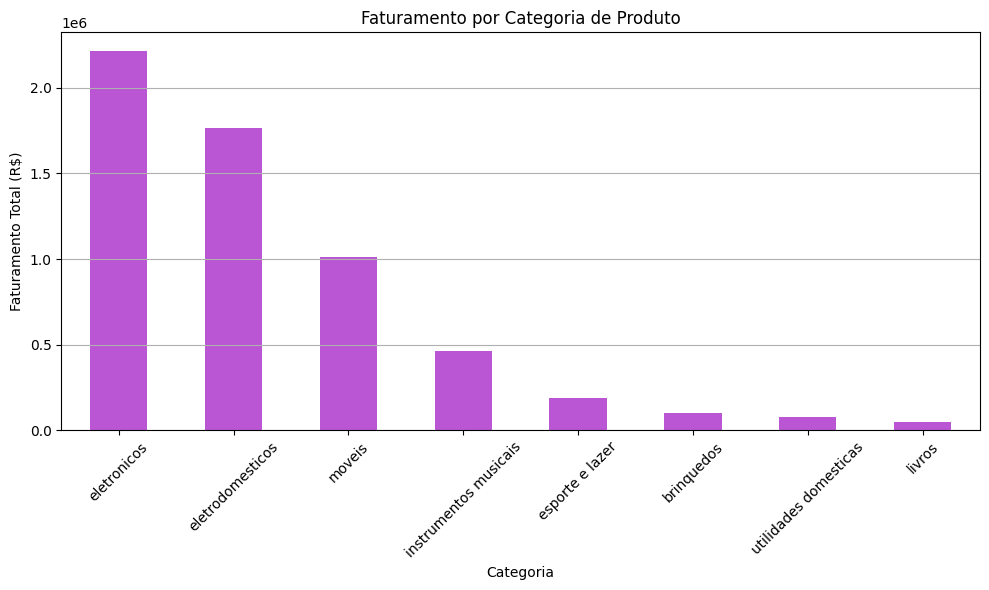

In [28]:
faturamento_categoria.plot(
    kind='bar',
    figsize=(10, 6),
    color='mediumorchid'
)
plt.title('Faturamento por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [19]:
avaliacao_media_por_loja = vendas.groupby('loja')['Avaliação da compra'].mean().sort_values(ascending=False)

In [29]:
print(avaliacao_media_por_loja)

loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


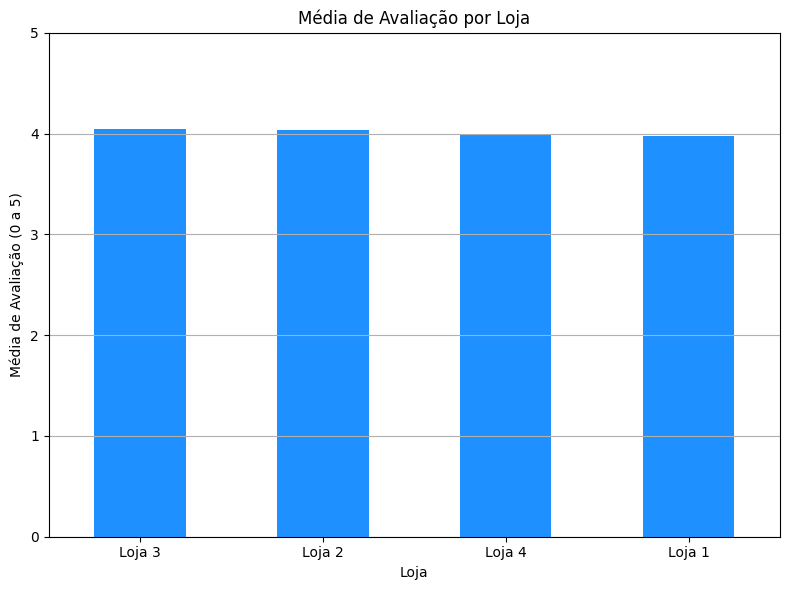

In [30]:
import matplotlib.pyplot as plt  # Garante que plt está definido

avaliacao_media_por_loja.plot(
    kind='bar',
    color='dodgerblue',
    figsize=(8, 6)
)
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação (0 a 5)')
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [21]:
vendas_por_produto = vendas['Produto'].value_counts()

print(vendas_por_produto)

Produto
Cômoda                         210
Carrinho controle remoto       206
Micro-ondas                    206
Bateria                        203
Cama king                      201
Secadora de roupas             200
Modelagem preditiva            200
Jogo de panelas                200
Cama box                       199
Blocos de montar               199
Celular Plus X42               198
Guarda roupas                  197
Pandeiro                       197
Bola de basquete               197
Bicicleta                      196
Iniciando em programação       195
Smart TV                       192
Geladeira                      191
Lava louças                    189
Faqueiro                       189
Violão                         188
Impressora                     188
Kit banquetas                  188
Copo térmico                   187
Fogão                          187
TV Led UHD 4K                  187
Corda de pular                 186
Mesa de jantar                 185
Bola de vôle

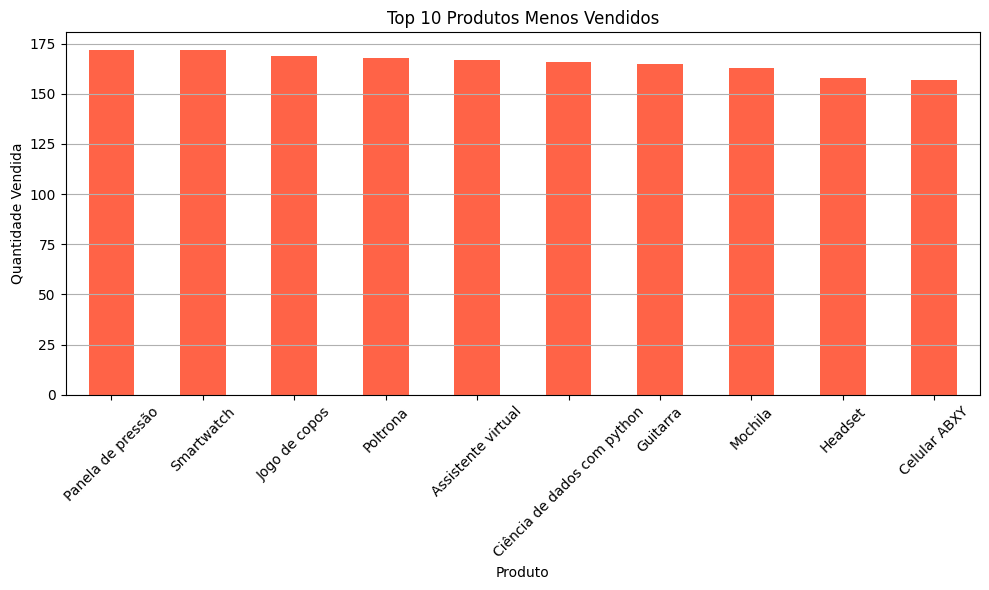

In [31]:
menos_vendidos = vendas_por_produto.tail(10)

menos_vendidos.plot(kind='bar', figsize=(10, 6), color='tomato')
plt.title('Top 10 Produtos Menos Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [23]:
frete_medio_por_loja = vendas.groupby('loja')['Frete'].mean().sort_values()

print(frete_medio_por_loja)

loja
Loja 4    31.278997
Loja 3    33.074464
Loja 2    33.621941
Loja 1    34.691805
Name: Frete, dtype: float64


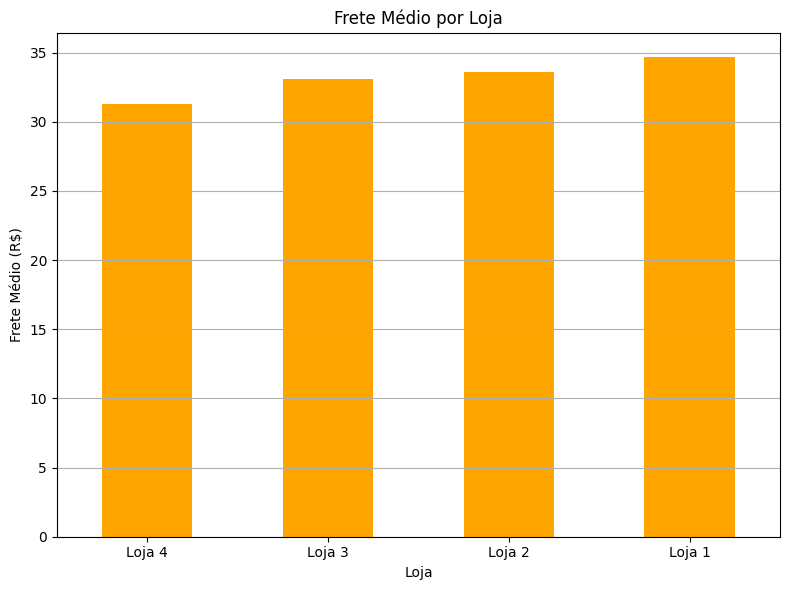

In [32]:
frete_medio_por_loja.plot(kind='bar', color='orange', figsize=(8,6))
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Relatório

Após analisar os dados de desempenho das quatro lojas da Alura Store, cheguei às seguintes conclusões:

Faturamento: A Loja 2 apresentou o menor faturamento entre todas, indicando um desempenho financeiro abaixo das demais.

Avaliações: A média de avaliação da Loja 2 também foi inferior, o que pode sugerir uma experiência menos satisfatória para os clientes.

Produtos vendidos: A Loja 2 aparece com menos produtos entre os mais vendidos e concentra boa parte dos menos vendidos, o que indica baixo giro de estoque.

Frete: Apesar de o frete não ser o mais caro, não se destacou positivamente nesse aspecto.

Categorias: As categorias mais fortes da Loja 2 não compensam o baixo volume de vendas e faturamento geral.

Recomendo que o Sr. João considere vender a Loja 2, pois ela apresenta o pior desempenho de forma geral: baixo faturamento, avaliações medianas, baixa rotatividade de produtos e nenhum destaque competitivo claro.

Ao focar nas lojas com melhor desempenho, o Sr. João pode redirecionar recursos e estratégias para ampliar ainda mais os lucros da rede.